In [121]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


original_df = pd.read_csv('Data.csv')

df_transpose = original_df.T

rows_to_drop = ['Country Name', 'Country Code', 'Series Code']
columns_to_drop = [4,14,17,19,25,28,30,41,55,56,57,58,59]

df_dropped_rows = df_transpose.drop(rows_to_drop)
df_dropped_columns_and_rows = df_dropped_rows.drop(columns_to_drop,axis=1)

df_smaller = df_dropped_columns_and_rows.replace('..', np.nan)

df_headless = df_smaller.drop('Series Name')

imp_mean = SimpleImputer(strategy='mean')
df = pd.DataFrame(imp_mean.fit_transform(df_headless))

Text(0.5, 1.0, 'External Debt')

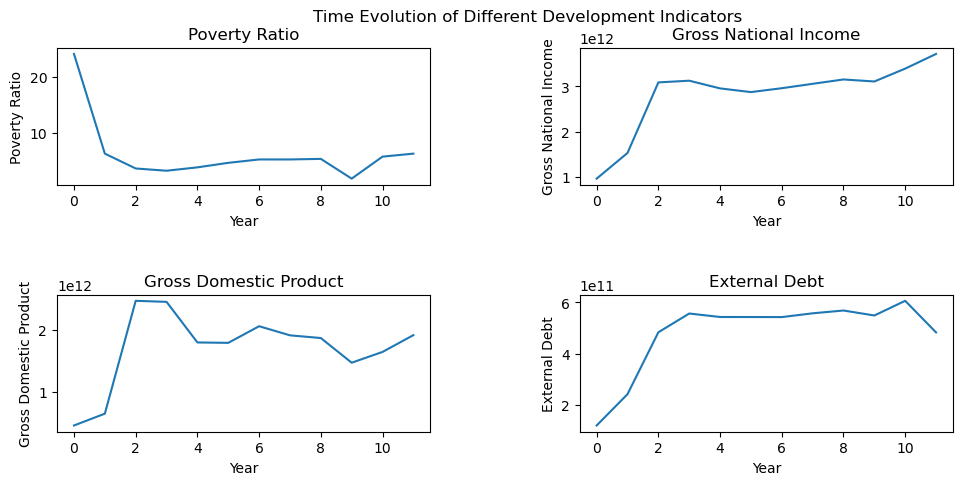

In [120]:
poverty_ratio = df.loc[0:11, 4]
gross_national_income = df.loc[0:11,7]
gross_domestic_product = df.loc[0:11,24]
external_debt = df.loc[0:11,41]

fig, axes = plt.subplots(2,2)
fig.suptitle('Time Evolution of Different Development Indicators',ha='left')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)

graph_poverty = sns.lineplot(data=poverty_ratio,ax=axes[0,0])
graph_poverty.set(xlabel ="Year", ylabel = "Poverty Ratio")
axes[0,0].set_title("Poverty Ratio")

graph_national_income = sns.lineplot(data=gross_national_income,ax=axes[0,1])
graph_national_income.set(xlabel='Year',ylabel='Gross National Income')
axes[0,1].set_title("Gross National Income")

graph_domestic_product = sns.lineplot(data=gross_domestic_product,ax=axes[1,0])
graph_domestic_product.set(xlabel='Year', ylabel='Gross Domestic Product')
axes[1,0].set_title("Gross Domestic Product")

graph_external_debt = sns.lineplot(data=external_debt,ax=axes[1,1])
graph_external_debt.set(xlabel='Year', ylabel='External Debt')
axes[1,1].set_title("External Debt")


3   20   -0.997348
20  3    -0.997348
0   22   -0.992830
22  0    -0.992830
10  20   -0.990275
20  10   -0.990275
7   22   -0.986696
22  7    -0.986696
dtype: float64


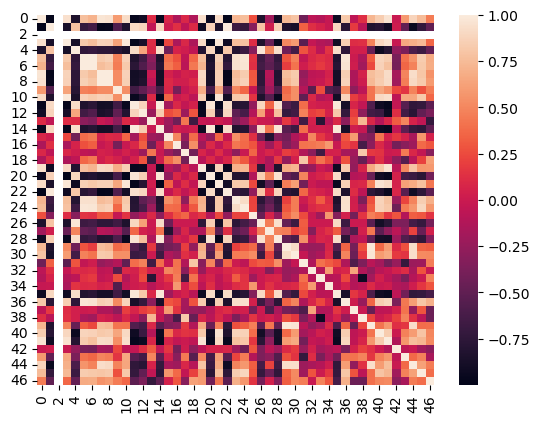

In [71]:
df_correlated = df.corr()

sns.heatmap(df_correlated)

df_stacked = df_correlated.stack()
highest_correlations = df_stacked.nsmallest(8)
print(highest_correlations)


0.9947021882812803
8176324.003691604
[-127190.19968779]


Text(0.5, 1.0, 'Fitted')

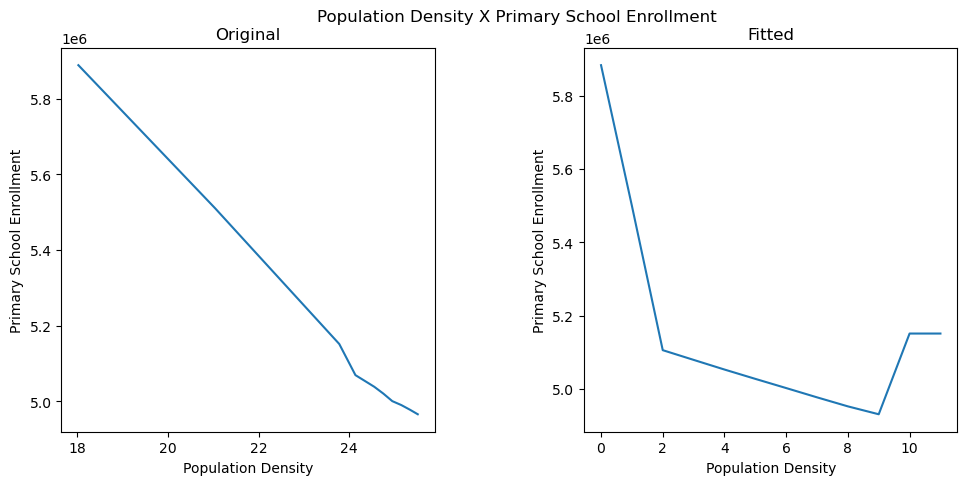

In [107]:
fig, axes = plt.subplots(1,2)
fig.suptitle('Population Density X Primary School Enrollment',ha='left')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

x_1_train = df.loc[:,3]
y_1_train = df.loc[:,20]

graph_1_train = sns.lineplot(x = x_1_train, y=y_1_train,ax=axes[0])
graph_1_train.set(xlabel='Population Density', ylabel='Primary School Enrollment')
axes[0].set_title("Original")

x_1 = df.loc[:,3].values.reshape((-1,1))
y_1 = df.loc[:,20]

model_1 = LinearRegression().fit(x_1,y_1)
r_sq_1 = model_1.score(x_1,y_1)

print(r_sq_1)
print(model_1.intercept_)
print(model_1.coef_)


y_predicted_1 = model_1.predict(x_1)

graph_1 = sns.lineplot(y_predicted_1,ax=axes[1])
graph_1.set(xlabel='Population Density', ylabel='Primary School Enrollment')
axes[1].set_title("Fitted")


0.9857121133961783
7.796558878620121
[-3.22763427e-08]


Text(0.5, 1.0, 'Fitted')

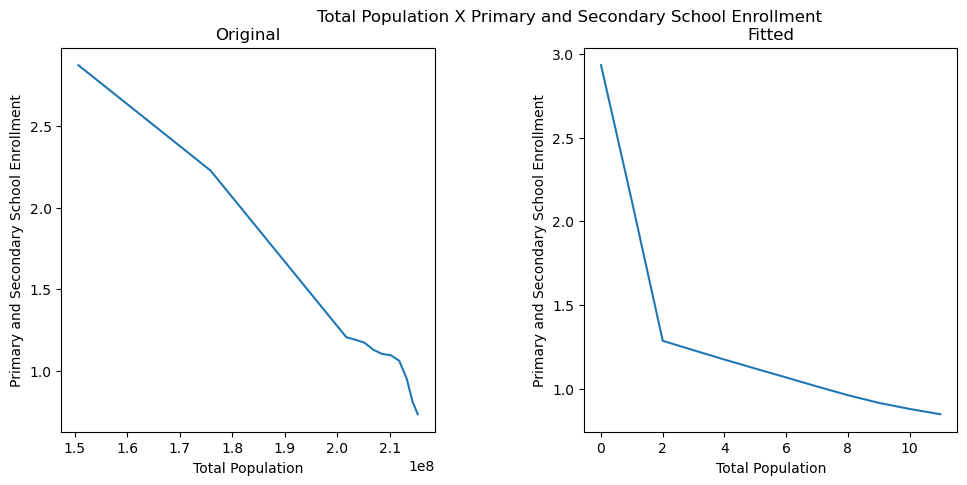

In [111]:
fig, axes = plt.subplots(1,2)
fig.suptitle('Total Population X Primary and Secondary School Enrollment',ha='left')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

x_2_train = df.loc[:,0]
y_2_train = df.loc[:,22]

graph_2_train = sns.lineplot(x = x_2_train, y=y_2_train,ax=axes[0])
graph_2_train.set(xlabel='Total Population', ylabel='Primary and Secondary School Enrollment')
axes[0].set_title("Original")

x_2 = df.loc[:,0].values.reshape((-1,1))
y_2 = df.loc[:,22]

model_2 = LinearRegression().fit(x_2,y_2)
r_sq_2 = model_2.score(x_2,y_2)

print(r_sq_2)
print(model_2.intercept_)
print(model_2.coef_)


y_predicted_2 = model_2.predict(x_2)

graph_2 = sns.lineplot(y_predicted_2,ax=axes[1])
graph_2.set(xlabel='Total Population', ylabel='Primary and Secondary School Enrollment')
axes[1].set_title("Fitted")

0.9806441505026321
12525770.665518448
[-100791.86803989]


Text(0.5, 1.0, 'Fitted')

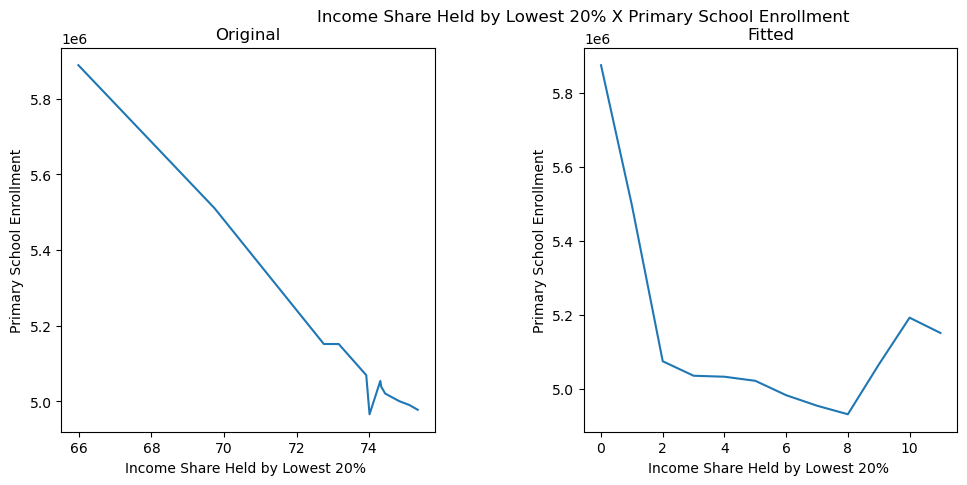

In [114]:
fig, axes = plt.subplots(1,2)
fig.suptitle('Income Share Held by Lowest 20% X Primary School Enrollment',ha='left')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

x_3_train = df.loc[:,10]
y_3_train = df.loc[:,20]

graph_3_train = sns.lineplot(x = x_3_train, y=y_3_train,ax=axes[0])
graph_3_train.set(xlabel='Income Share Held by Lowest 20% ', ylabel='Primary School Enrollment')
axes[0].set_title("Original")

x_3 = df.loc[:,10].values.reshape((-1,1))
y_3 = df.loc[:,20]

model_3 = LinearRegression().fit(x_3,y_3)
r_sq_3 = model_3.score(x_3,y_3)

print(r_sq_3)
print(model_3.intercept_)
print(model_3.coef_)


y_predicted_3 = model_3.predict(x_3)

graph_3 = sns.lineplot(y_predicted_3,ax=axes[1])
graph_3.set(xlabel='Income Share Held by Lowest 20% ', ylabel='Primary School Enrollment')
axes[1].set_title("Fitted")

0.9735696492947421
3.5206764401925863
[-7.86423537e-13]


Text(0.5, 1.0, 'Fitted')

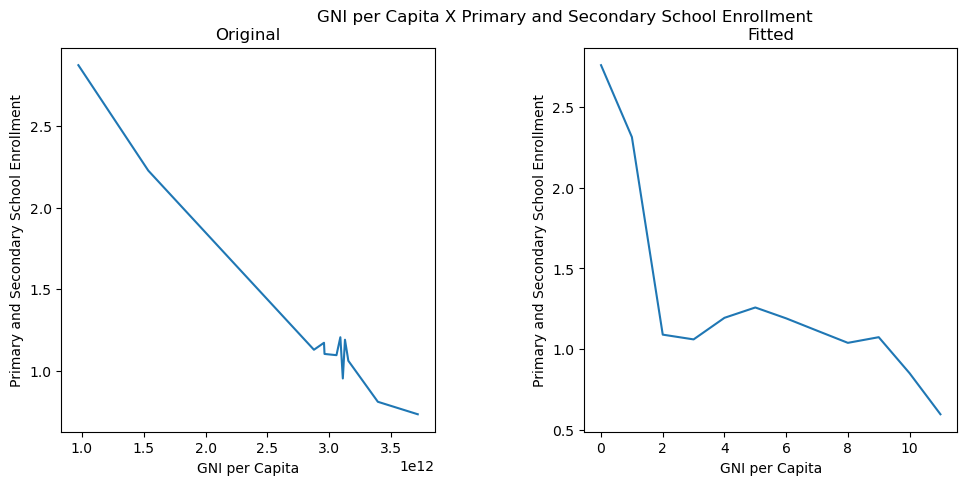

In [117]:
fig, axes = plt.subplots(1,2)
fig.suptitle('GNI per Capita X Primary and Secondary School Enrollment',ha='left')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

x_4_train = df.loc[:,7]
y_4_train = df.loc[:,22]

graph_4_train = sns.lineplot(x = x_4_train, y=y_4_train,ax=axes[0])
graph_4_train.set(xlabel='GNI per Capita', ylabel='Primary and Secondary School Enrollment')
axes[0].set_title("Original")

x_4 = df.loc[:,7].values.reshape((-1,1))
y_4 = df.loc[:,22]

model_4 = LinearRegression().fit(x_4,y_4)
r_sq_4 = model_4.score(x_4,y_4)

print(r_sq_4)
print(model_4.intercept_)
print(model_4.coef_)


y_predicted_4 = model_4.predict(x_4)

graph_4 = sns.lineplot(y_predicted_4,ax=axes[1])
graph_4.set(xlabel='GNI per Capita', ylabel='Primary and Secondary School Enrollment')
axes[1].set_title("Fitted")